In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [3]:
ls

 Volume in drive C is WINDOWS
 Volume Serial Number is 468D-6BAF

 Directory of C:\Users\I NET\OneDrive\Desktop\data science\data assig\Ramdom forest

28/12/2022  11:09 AM    <DIR>          .
28/12/2022  11:09 AM    <DIR>          ..
28/12/2022  11:08 AM    <DIR>          .ipynb_checkpoints
27/12/2022  10:03 PM            74,520 Company RF.ipynb
27/12/2022  05:19 PM            17,023 Company_Data.csv
27/12/2022  05:19 PM            21,837 Fraud_check (1).csv
27/12/2022  05:19 PM             1,378 problem statement(company data).txt
27/12/2022  05:19 PM               133 Problem_statement(Fraudcheck).txt
28/12/2022  11:09 AM           108,219 RF classification.ipynb
28/12/2022  11:05 AM               129 tree.dot
               7 File(s)        223,239 bytes
               3 Dir(s)  859,973,885,952 bytes free


In [4]:
df=pd.read_csv("Company_Data.csv")

In [5]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le =LabelEncoder()


In [8]:
df2=le.fit_transform(df['ShelveLoc'])
df['ShelveLoc']=df2
df2=le.fit_transform(df['Urban'])
df['Urban']=df2
df2=le.fit_transform(df['US'])
df['US']=df2

In [9]:
df.head(1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.5,138,73,11,276,120,0,42,17,1,1


In [10]:
fr=RandomForestRegressor()

In [11]:
y=df.iloc[:,[0]]
X=df.iloc[:,[1,2,3,4,5,6,7,8,9,10]]

In [12]:
y

,Sales
0,9.50
1,11.22
2,10.06
3,7.40
4,4.15
...,...
395,12.57
396,6.14
397,7.41
398,5.94


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
import warnings
# run block of code and catch warnings
with warnings.catch_warnings():
    
      # ignore all caught warnings
        warnings.filterwarnings("ignore")
       # execute code that will generate warnings

In [15]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore')

In [16]:
model=fr.fit(X_train, y_train)
pred=model.predict(X_test)

In [17]:
from sklearn import metrics 

In [18]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred)))


Mean Absolute Error (MAE): 1.3152075
Mean Squared Error (MSE): 2.622778647250001
Root Mean Squared Error (RMSE): 1.619499505171274


In [19]:
model.predict([[138,73,11,276,120,0,42,17,1,1]])

array([6.4498])

In [20]:
n_estimators=[50,1000,200]
max_depth=[5,10,9,3,6,12,13,7,20]
min_samples_leaf=[10,13,14]
l=[]
for i in n_estimators:
   # for j in max_depth:
        for k in min_samples_leaf:
            regr= RandomForestRegressor(random_state=0,n_estimators=i,min_samples_leaf=k)
            model=regr.fit(X_train, y_train)
            pred=model.predict(X_test)
            l.append(metrics.mean_absolute_error(y_test, pred))

            
        



In [21]:
print(min(l))

1.4526870605079754


In [22]:
regr= RandomForestRegressor(random_state=0,n_estimators=600,min_samples_leaf=12)
model=regr.fit(X_train, y_train)
pred=model.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error (MAE): 1.4816887438850235
Mean Squared Error (MSE): 3.566831104104453
Root Mean Squared Error (RMSE): 1.8886055978166678


In [23]:
(pred)

array([ 7.79852974,  5.38941288,  9.23522857,  5.62564487,  8.29105944,
        5.311215  , 10.4514136 ,  8.3214244 ,  8.84115673,  8.0567064 ,
        6.85260597,  8.59395678,  9.98001482,  6.63848037,  6.59218051,
        9.77201806,  7.08472653, 10.72232033,  7.88955977,  7.36071976,
        9.23827012,  5.14258389,  5.37002106,  6.13824106,  6.48635246,
        7.43147853,  7.06972893,  8.38695829,  7.60405209,  5.54833904,
        9.70295969,  9.22755564,  6.38157133,  4.96029789,  9.43118512,
        6.33791479,  6.02859217,  7.62853216,  9.28016585,  5.10026411,
        5.04573221,  5.7022497 ,  9.37240546, 10.34244983,  7.78816201,
        7.0215586 ,  6.55074289,  8.61971833,  5.90968057,  6.57111264,
       10.42168899,  8.16391915,  7.77839853,  8.55469665,  7.87382042,
        4.63324752,  6.31347189,  9.82617211, 10.64358125,  8.73956604,
        8.64507804,  9.16693843,  8.1722014 ,  4.97440429,  7.85705463,
        8.17317293,  9.42259424,  8.09235485,  5.84738347,  9.81

In [24]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [30,60,20,50,100,200],
    'max_depth': [5,10,9,3,6,12,13,7,20],
    'min_samples_leaf': [10,13,14,9,8,15,20]
}

regr=RandomForestRegressor(random_state=0)


In [25]:
grid= GridSearchCV(estimator=regr,cv=20,param_grid=params)

In [26]:
grid.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [5, 10, 9, 3, 6, 12, 13, 7, 20],
                         'min_samples_leaf': [10, 13, 14, 9, 8, 15, 20],
                         'n_estimators': [30, 60, 20, 50, 100, 200]})

In [27]:
import matplotlib.pyplot as plt

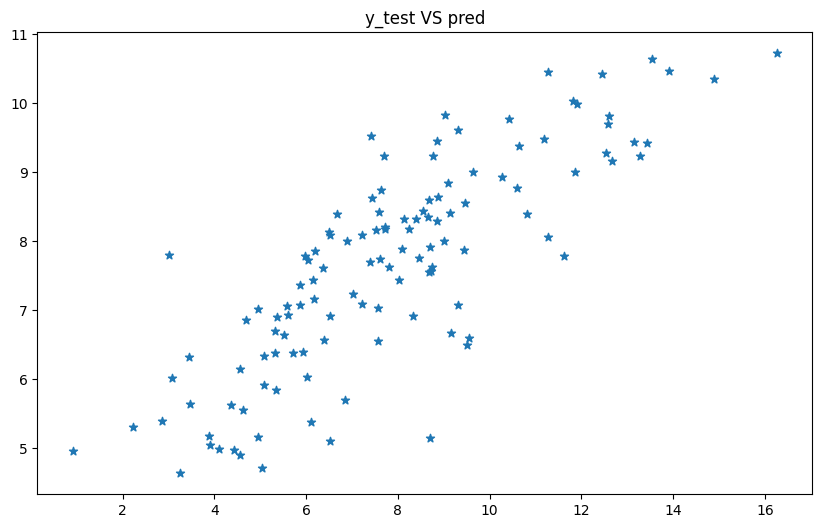

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,pred,marker='*')
plt.title("y_test VS pred")
plt.show()

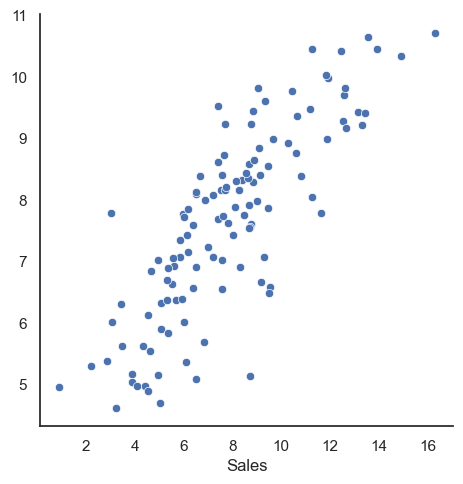

In [29]:
import seaborn as sns
cmap=sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.set_theme(style="white")
sns.relplot(x=y_test["Sales"], y=pred,palette=cmap)


In [30]:
y_test


,Sales
209,3.02
280,2.86
33,8.77
210,4.36
93,8.86
...,...
60,8.32
79,9.14
285,7.60
305,8.03


# Random Regressionimprovment (with Visiulization)

In [32]:
df=pd.read_csv("Company_Data.csv")

In [33]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [39]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [34]:
df2=le.fit_transform(df['ShelveLoc'])
df['ShelveLoc']=df2
df2=le.fit_transform(df['Urban'])
df['Urban']=df2
df2=le.fit_transform(df['US'])
df['US']=df2

In [35]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [36]:
from sklearn.preprocessing import MinMaxScaler
scl=MinMaxScaler()
df=pd.DataFrame(scl.fit_transform(df),columns=df.columns)

In [37]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875,1.0,1.0
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,0.727273,0.000,1.0,1.0
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,0.618182,0.250,1.0,1.0
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.545455,0.500,1.0,1.0
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375,1.0,0.0


In [38]:
y=df.iloc[:,[0]]
X=df.iloc[:,[1,2,3,4,5,6,7,8,9,10]]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [20,50,100],
    'max_depth': [5,10,9,3,6],
    'min_samples_leaf': [10,13,14]}

reg=RandomForestRegressor(random_state=0)
grid= GridSearchCV(estimator=reg,cv=5,param_grid=params)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [5, 10, 9, 3, 6],
                         'min_samples_leaf': [10, 13, 14],
                         'n_estimators': [20, 50, 100]})

In [44]:
 sorted(grid.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_min_samples_leaf',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [49]:
grid.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=10, n_estimators=20,
                      random_state=0)

In [51]:
regr= RandomForestRegressor(random_state=20,n_estimators=20,min_samples_leaf=10,max_depth=10)
model=regr.fit(X_train, y_train)
pred=model.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error (MAE): 0.08847336213871025
Mean Squared Error (MSE): 0.012363320223923113
Root Mean Squared Error (RMSE): 0.11119046822422826


In [74]:
import dtreeviz

In [79]:
viz = dtreeviz(model.estimators_[0],X_train, y_train, feature_names=X.columns, target_name="y")
viz


TypeError: 'module' object is not callable

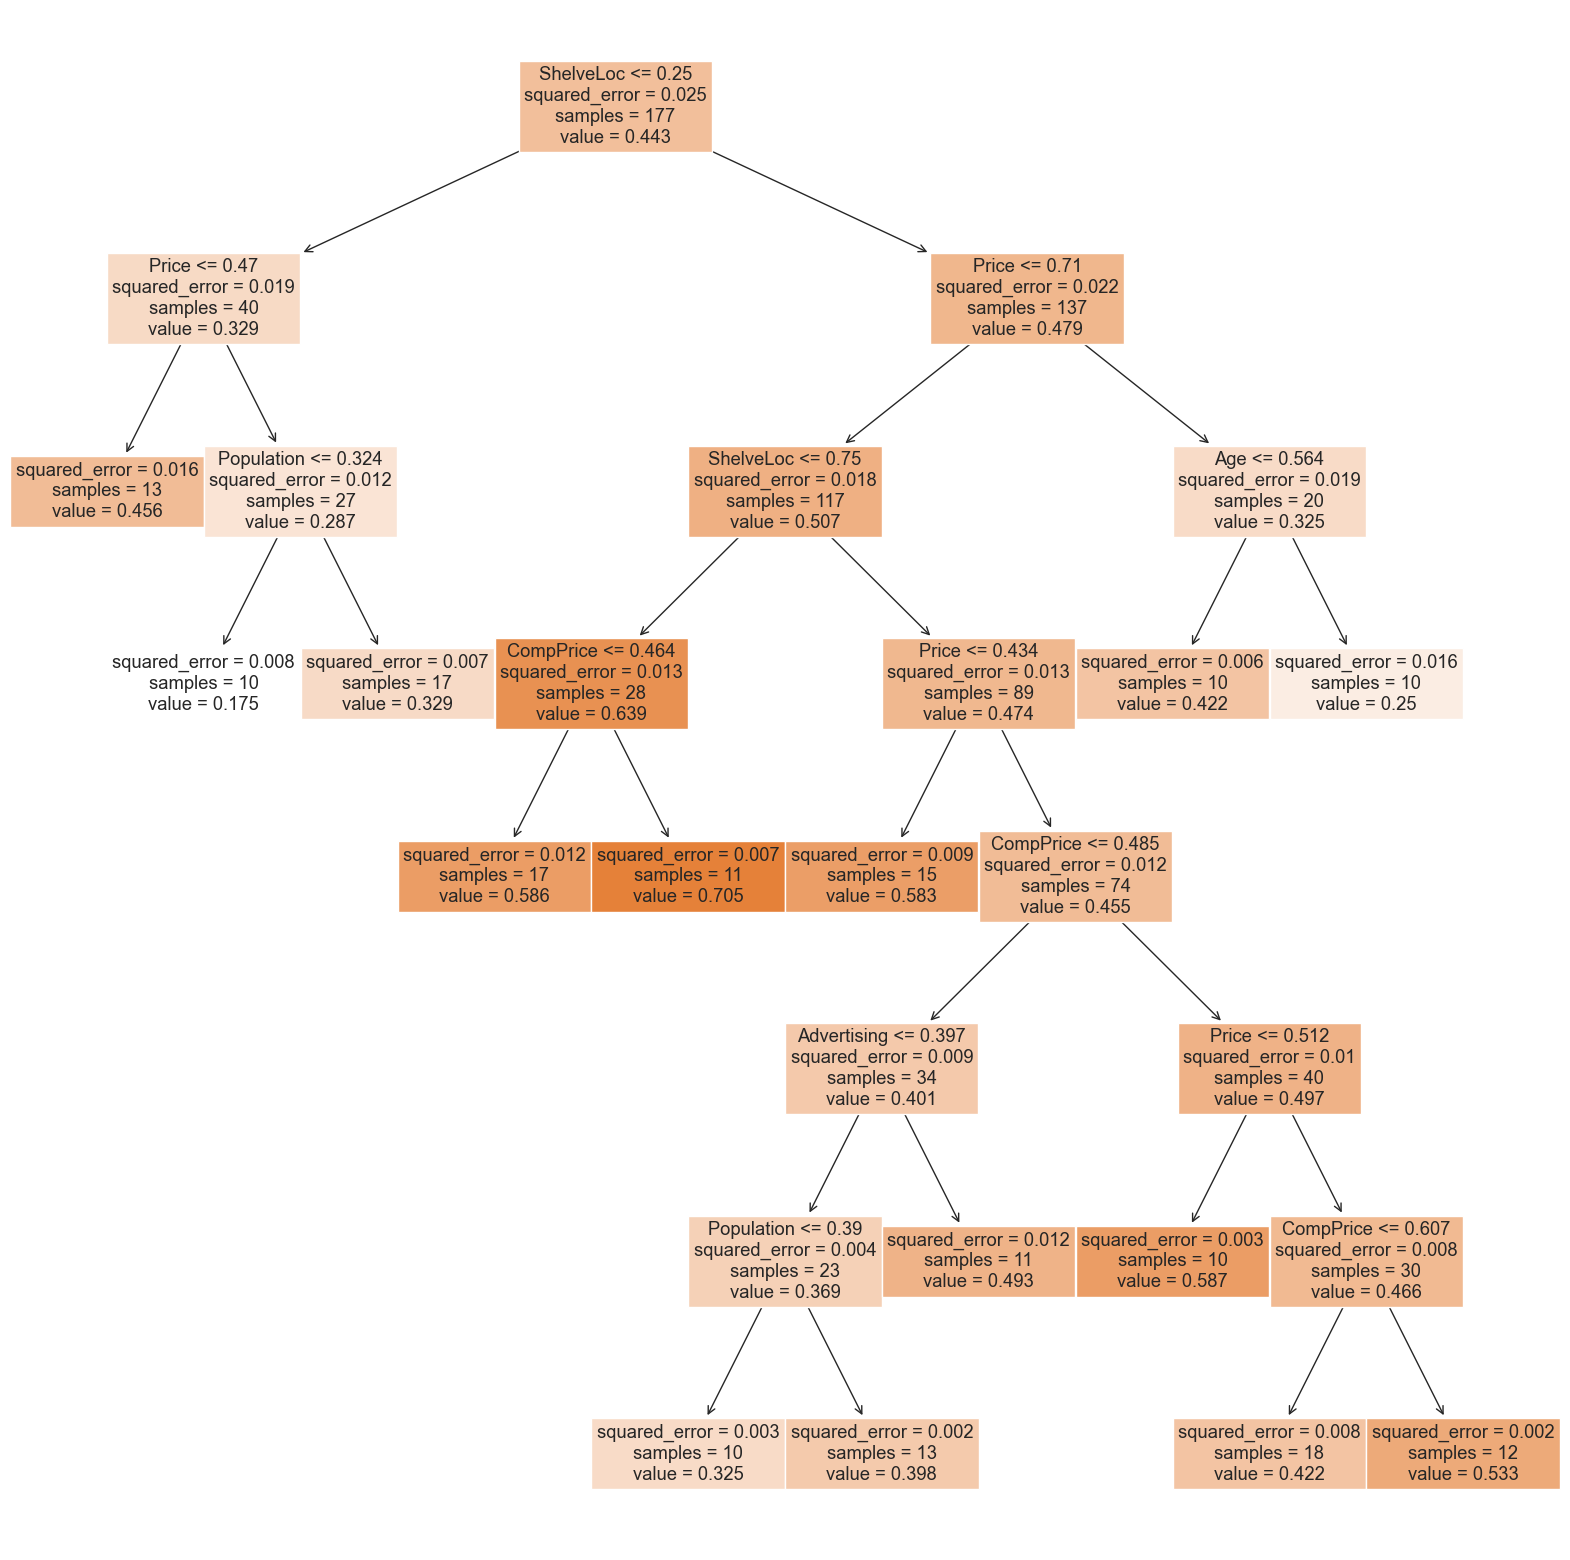

In [78]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(model.estimators_[0], feature_names=X.columns, filled=True)